In [25]:
import pandas as pd
df = pd.read_csv("Titanic_train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

<Figure size 1000x600 with 0 Axes>

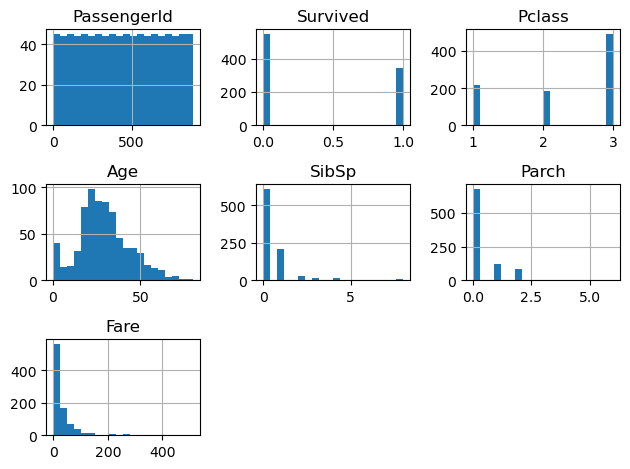

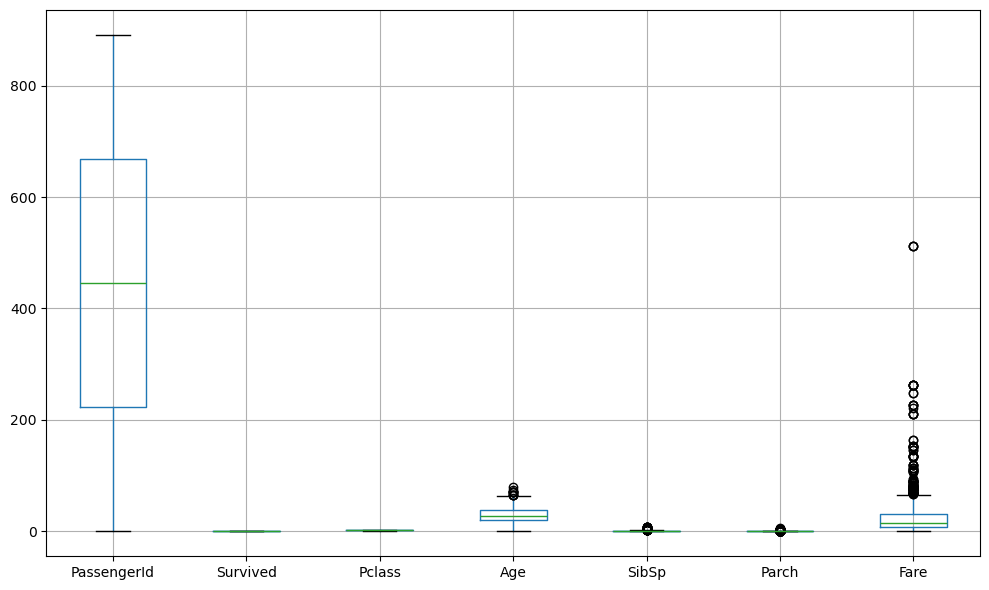

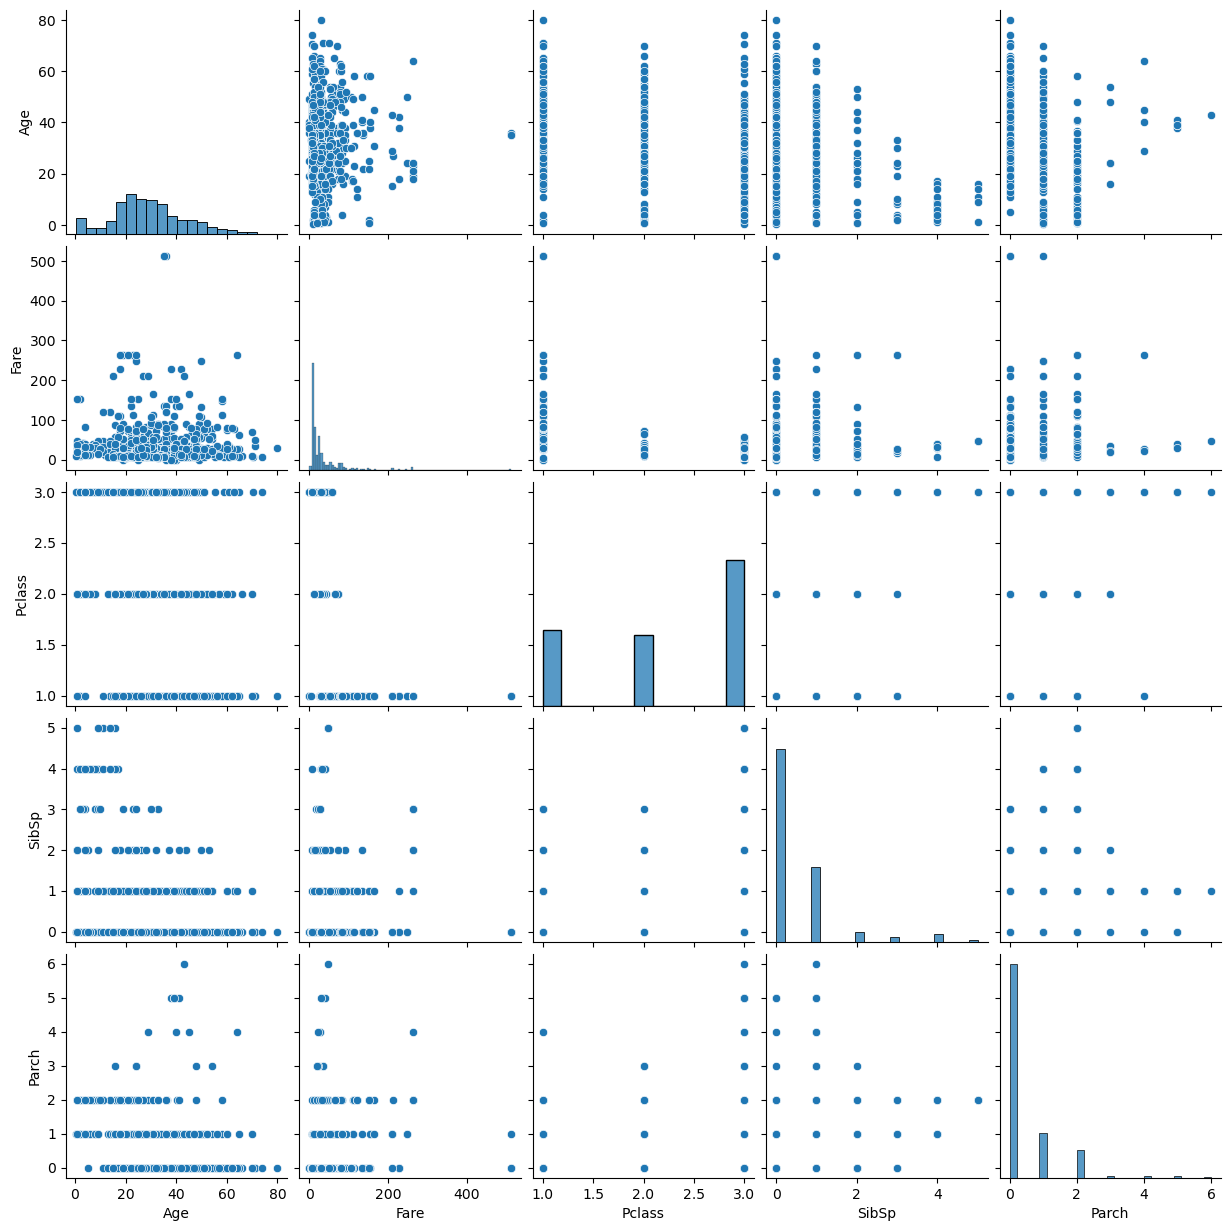

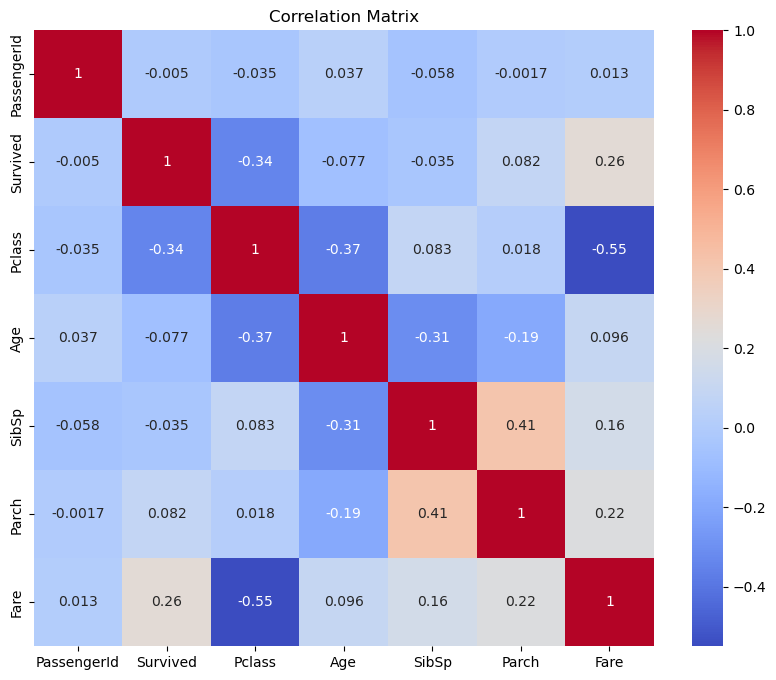

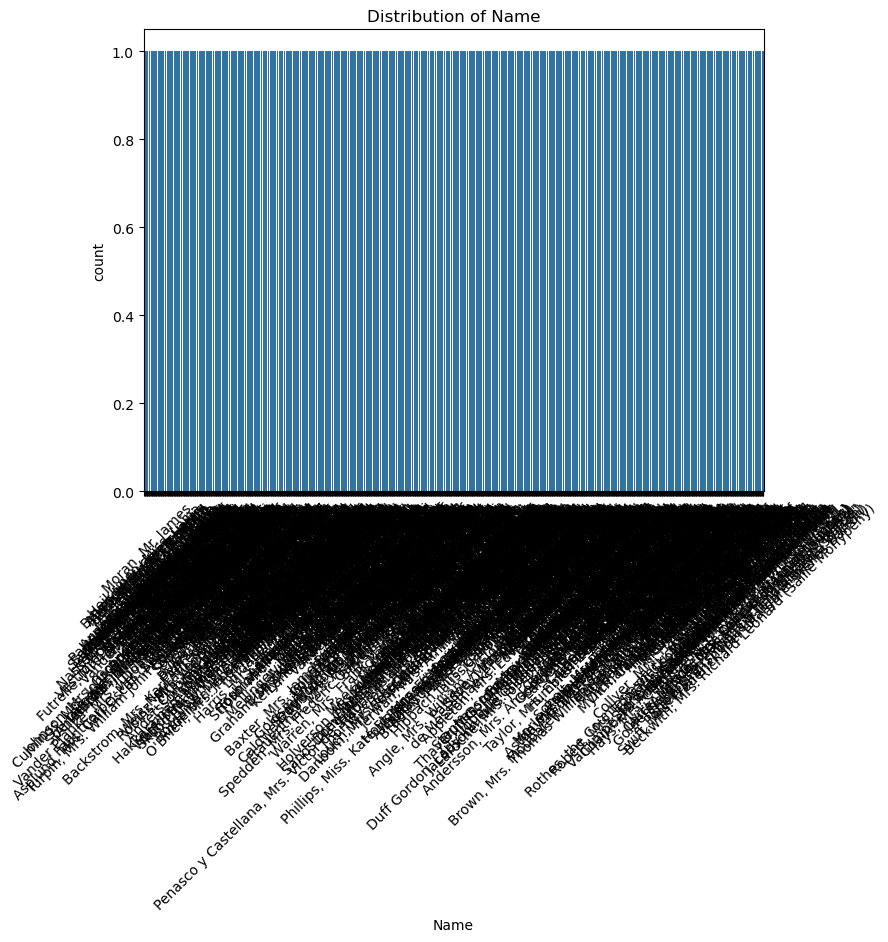

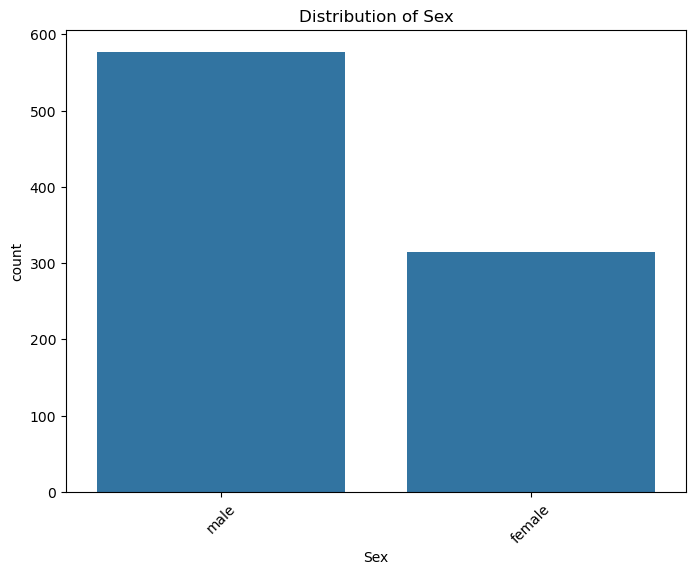

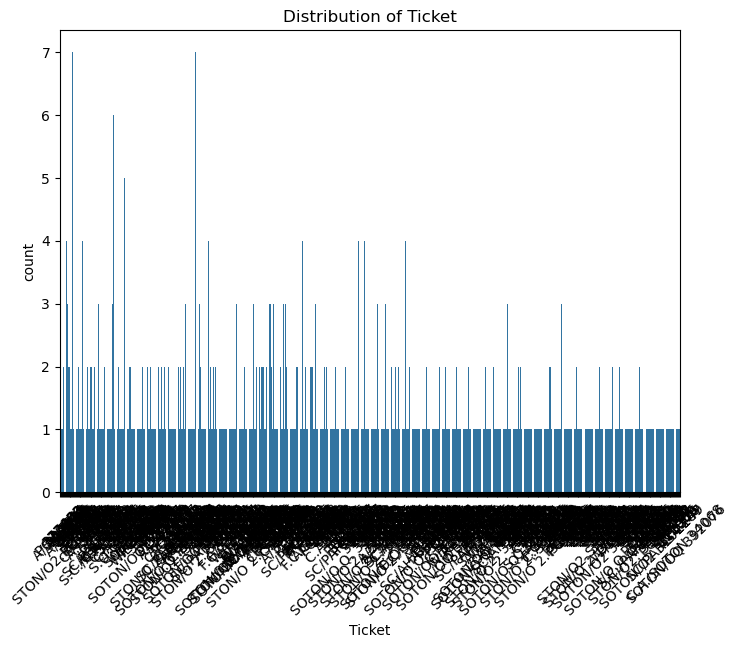

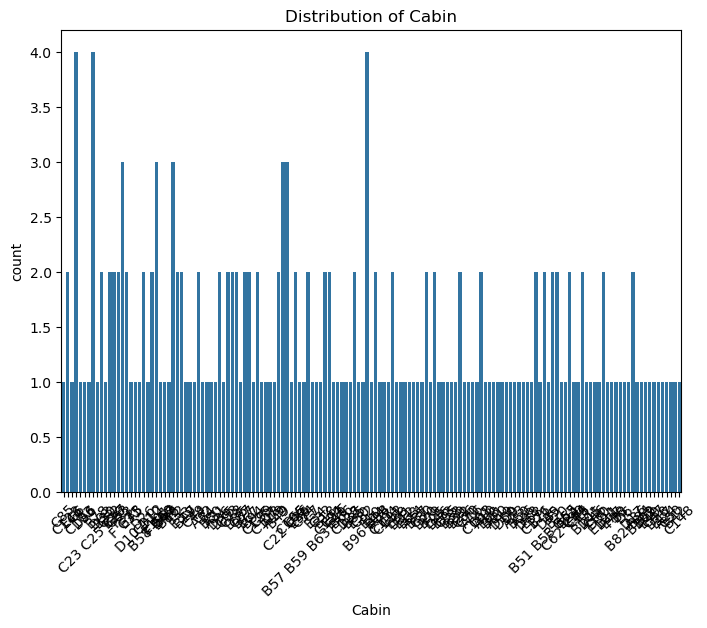

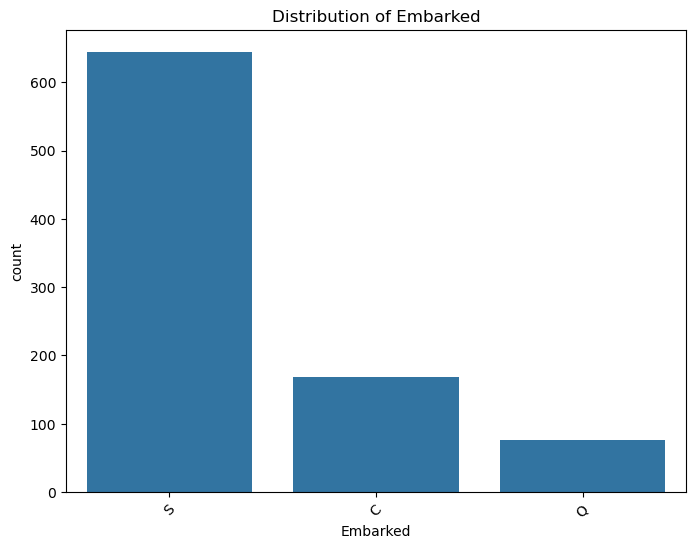

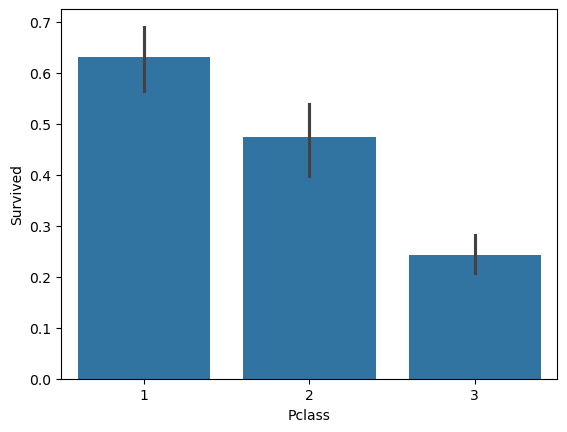

In [1]:
#  1. Data Exploration:
# a. Load the dataset and perform exploratory data analysis (EDA).
# b. Examine the features, their types, and summary statistics.
# c. Create visualizations such as histograms, box plots, or pair plots to visualize the distributions and relationships between features.
# Analyze any patterns or correlations observed in the data.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (assuming it's already uploaded to your Colab environment)
df = pd.read_csv("Titanic_train.csv")

# Display the first few rows
print(df.head())

# Examine the features, their types, and summary statistics
print(df.info())
print(df.describe())

# Visualize distributions and relationships between features

# Histograms for numerical features
plt.figure(figsize=(10, 6))
df.hist(bins=20)
plt.tight_layout()
plt.show()

# Box plots for numerical features
plt.figure(figsize=(10, 6))
df.boxplot()
plt.tight_layout()
plt.show()


# Pair plot for selected numerical features (e.g., 'Age', 'Fare', 'Pclass', 'SibSp', 'Parch')
sns.pairplot(df[['Age', 'Fare', 'Pclass', 'SibSp', 'Parch']].dropna()) # Drop rows with missing values for plotting
plt.show()

# Analyze correlations between numerical features
numerical_features = df.select_dtypes(include=['number'])
correlation_matrix = numerical_features.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Explore categorical features
for column in df.select_dtypes(include=['object']).columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=column, data=df)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)
    plt.show()

# Survival rate by Pclass
sns.barplot(x="Pclass", y="Survived", data=df)
plt.show()




In [2]:
#  2. Data Preprocessing:
# a. Handle missing values (e.g., imputation).
# b. Encode categorical variables.

## Check if the 'Embarked' column exists before imputation
if 'Embarked' in df.columns:
    # Handle missing values
    # Impute missing 'Age' values with the median age
    df['Age'].fillna(df['Age'].median(), inplace=True)

    # Fill missing 'Embarked' values with the most frequent value
    df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

    # Drop the 'Cabin' column due to high number of missing values (or impute if you have a strategy)
    df.drop('Cabin', axis=1, inplace=True)


    # Encode categorical variables
    # One-hot encode 'Sex' and 'Embarked'
    df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)
else:
    print("Embarked column has already been preprocessed.")
    


print(df.head())
print(df.info())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0      1      0   
2                             Heikkinen, Miss. Laina  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0      1      0   
4                           Allen, Mr. William Henry  35.0      0      0   

             Ticket     Fare  Sex_male  Embarked_Q  Embarked_S  
0         A/5 21171   7.2500      True       False        True  
1          PC 17599  71.2833     False       False       False  
2  STON/O2. 3101282   7.9250     False       False        True  
3            113803  53.1000     False       False        True  
4

C:\Users\vogul\AppData\Local\Temp\ipykernel_3464\3490645191.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\vogul\AppData\Local\Temp\ipykernel_3464\3490645191.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

In [3]:


#  3. Model Building:
# a. Build a logistic regression model using appropriate libraries (e.g., scikit-learn).
# b. Train the model using the training data.

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Define features (X) and target variable (y)
X = df.drop(['Survived', 'Name', 'Ticket'], axis=1)  # Features (all columns except 'Survived', 'Name', and 'Ticket') # Drop 'Name' and 'Ticket' columns
y = df['Survived']  # Target variable ('Survived')

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80% train, 20% test

# Initialize and train the logistic regression model
model = LogisticRegression(max_iter=1000) # Increased max_iter to ensure convergence
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the logistic regression model: {accuracy}")


Accuracy of the logistic regression model: 0.8044692737430168


Accuracy: 0.8044692737430168
Precision: 0.7746478873239436
Recall: 0.7432432432432432
F1-score: 0.7586206896551724
ROC-AUC score: 0.8769626769626769


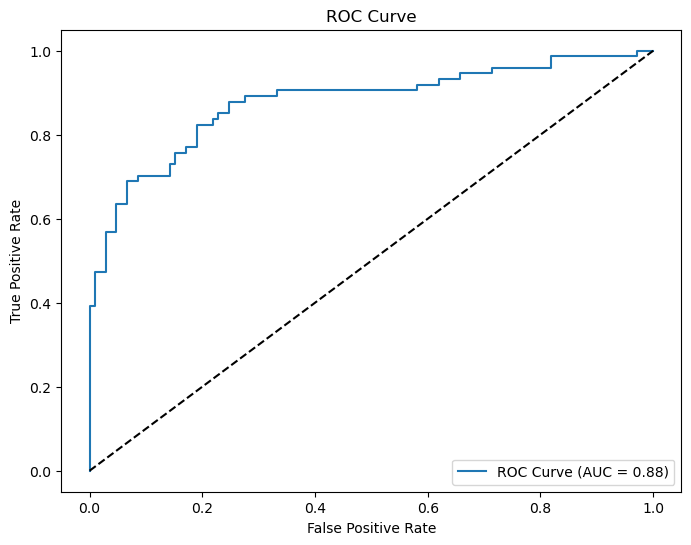

In [13]:
# 4. Model Evaluation:
# a. Evaluate the performance of the model on the testing data using accuracy, precision, recall, F1-score, and ROC-AUC score.
# Visualize the ROC curve.

from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt



# Make predictions on the test set
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
print(f"ROC-AUC score: {roc_auc}")

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


In [7]:
#  5. Interpretation:
# a. Interpret the coefficients of the logistic regression model.
# b. Discuss the significance of features in predicting the target variable (survival probability in this case).

# Get the coefficients and feature names
coefficients = model.coef_[0]
feature_names = X.columns

# Create a DataFrame for better visualization
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort by absolute coefficient value for easier interpretation
coefficients_df = coefficients_df.reindex(coefficients_df['Coefficient'].abs().sort_values(ascending=False).index)

print(coefficients_df)

# Interpretation
print("\nInterpretation of Coefficients:")
for index, row in coefficients_df.iterrows():
    feature = row['Feature']
    coefficient = row['Coefficient']
    if coefficient > 0:
        print(f"- An increase in '{feature}' is associated with a higher predicted probability of survival.")
    else:
        print(f"- An increase in '{feature}' is associated with a lower predicted probability of survival.")

# Significance of Features
print("\nSignificance of Features:")
print("Based on the magnitude of the coefficients, the most important features for predicting survival appear to be:")
for index, row in coefficients_df.head(5).iterrows():  # Display top 5 features
    print(f"- {row['Feature']}")

print("\nNote:")
print("- The coefficients represent the change in the log-odds of survival for a one-unit increase in the feature, holding other features constant.")
print("- Features with larger absolute coefficient values have a stronger influence on the prediction.")
print("- Statistical significance testing (e.g., p-values) would provide further insights into the reliability of these coefficients.")


       Feature  Coefficient
6     Sex_male    -2.607502
1       Pclass    -0.934925
8   Embarked_S    -0.400222
3        SibSp    -0.286776
4        Parch    -0.118305
7   Embarked_Q    -0.107595
2          Age    -0.030610
5         Fare     0.002602
0  PassengerId     0.000353

Interpretation of Coefficients:
- An increase in 'Sex_male' is associated with a lower predicted probability of survival.
- An increase in 'Pclass' is associated with a lower predicted probability of survival.
- An increase in 'Embarked_S' is associated with a lower predicted probability of survival.
- An increase in 'SibSp' is associated with a lower predicted probability of survival.
- An increase in 'Parch' is associated with a lower predicted probability of survival.
- An increase in 'Embarked_Q' is associated with a lower predicted probability of survival.
- An increase in 'Age' is associated with a lower predicted probability of survival.
- An increase in 'Fare' is associated with a higher predicted prob

In [15]:
pip install streamlit


Note: you may need to restart the kernel to use updated packages.


In [17]:
import subprocess
subprocess.run(["streamlit", "run", "titanic_app.py"])


CompletedProcess(args=['streamlit', 'run', 'titanic_app.py'], returncode=2)

In [21]:
#  6. Deployment with Streamlit:
 

import streamlit as st
import pandas as pd
import pickle

# Load the trained model
try:
    with open('logistic_regression_model.pkl', 'rb') as file:
        model = pickle.load(file)
except FileNotFoundError:
    st.error("Model file not found. Please ensure 'logistic_regression_model.pkl' is in the same directory.")
    st.stop()


# Function to make predictions
def predict_survival(Pclass, Sex, Age, SibSp, Parch, Fare, Embarked):
    # Create a DataFrame for prediction
    input_data = pd.DataFrame({
        'Pclass': [Pclass],
        'Sex': [Sex],
        'Age': [Age],
        'SibSp': [SibSp],
        'Parch': [Parch],
        'Fare': [Fare],
        'Embarked': [Embarked]
    })
    
 
    # Example: One-hot encoding
    # input_data = pd.get_dummies(input_data, columns=['Sex', 'Embarked'], drop_first=True)

    prediction = model.predict(input_data)[0]
    return prediction


# Streamlit app
st.title("Titanic Survival Prediction")

# User inputs
Pclass = st.selectbox("Pclass", [1, 2, 3])
Sex = st.selectbox("Sex", ["male", "female"])
Age = st.number_input("Age", min_value=0, max_value=100, value=30)
SibSp = st.number_input("Siblings/Spouses Aboard", min_value=0, value=0)
Parch = st.number_input("Parents/Children Aboard", min_value=0, value=0)
Fare = st.number_input("Fare", min_value=0.0, value=10.0)
Embarked = st.selectbox("Embarked", ["C", "Q", "S"])


# Make prediction
if st.button("Predict"):
    prediction = predict_survival(Pclass, Sex, Age, SibSp, Parch, Fare, Embarked)
    if prediction == 1:
        st.success("Passenger is predicted to survive.")
    else:
        st.error("Passenger is predicted to not survive.")


In [23]:
import subprocess
subprocess.run(["streamlit", "run", "titanic_app.py"])


CompletedProcess(args=['streamlit', 'run', 'titanic_app.py'], returncode=2)

In [27]:
#  Interview Questions:
# 1. What is the difference between precision and recall?
# 2. What is cross-validation, and why is it important in binary classification?


# 1. Precision and Recall:

# Precision: Out of all the instances predicted as positive, what proportion was actually positive?
#   - Precision focuses on the accuracy of positive predictions.
#   - High precision means that when the model predicts something as positive, it's likely correct.
#   - Example: In spam detection, high precision means that the model rarely classifies legitimate emails as spam.

# Recall (Sensitivity or True Positive Rate): Out of all the instances that are actually positive, what proportion did the model correctly predict as positive?
#   - Recall focuses on the completeness of positive predictions.
#   - High recall means that the model is good at identifying positive instances.
#   - Example: In medical diagnosis, high recall means that the model correctly identifies most patients with the disease.


# The relationship between precision and recall is often an inverse relationship.  Increasing one can sometimes decrease the other.
# The F1-score (harmonic mean of precision and recall) is often used to balance precision and recall.

# 2. Cross-validation and its importance in binary classification:

# Cross-validation is a technique for evaluating the performance of a machine learning model.  It involves splitting the data into multiple subsets (folds), training the model on some folds, and testing on the remaining fold.  This process is repeated multiple times, with different folds used for testing each time.  The results are then averaged to provide a more robust estimate of the model's performance.

# In binary classification, cross-validation is particularly important because it helps to:

#   - Estimate the model's generalization ability: How well the model performs on unseen data.
#   - Avoid overfitting:  Overfitting occurs when a model learns the training data too well, including its noise, and performs poorly on new data. Cross-validation can detect overfitting by revealing a significant difference between training and validation performance.
#   - Tune hyperparameters: Cross-validation is crucial for finding the best hyperparameter settings (e.g., in KNN, the number of neighbors) for the specific dataset. It allows for robust evaluation of different settings and selection of the optimal combination based on average performance across multiple folds.
#   - Obtain a more reliable performance estimate:  By using multiple folds, cross-validation provides a more reliable performance estimate than using a single train-test split, which can be susceptible to the random selection of data points for training and testing.

# Common types of cross-validation include k-fold, stratified k-fold, and leave-one-out.  The choice of cross-validation method depends on the dataset and the problem at hand.

